# Vizualizácia zhlukovej analýzy z ecommerce dát

## Bakalárska práca

# Školiteľ: Mgr. Jaroslav Reichel, PhD.

## Študent: Filip Perička

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
import datetime
import time

from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
 
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import warnings 
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\\filip\\Python\\Python")

In [9]:
df = pd.read_csv("Customer360Insights.csv", sep=",")
display(df)
df.info()
#https://www.kaggle.com/datasets/davedarshan/customer360insights/data

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-12-24 06:49:00,1671,Daniel Jordan,Female,72,705,5746,China,Shandong,Jinan,...,50,1,Twitter-ads,2023-12-24 07:02:00,True,2023-12-24 07:07:00,Credit Card,2023-12-24 07:04:00,False,NaN
1996,2023-12-25 16:38:00,1778,Shawn Edwards,Female,67,743,6481,Canada,Ontario,Mississauga,...,1500,2,E-mails,2023-12-25 17:07:00,True,2023-12-25 17:18:00,Debit Card,2023-12-25 17:12:00,False,NaN
1997,2023-12-28 05:09:00,1253,Michelle Friedman,Male,35,610,6169,Italy,Lazio,Latina,...,1500,3,Twitter-ads,2023-12-28 05:36:00,True,2023-12-28 05:41:00,Debit Card,2023-12-28 05:40:00,False,NaN
1998,2023-12-30 07:22:00,1586,Ashley Mcmillan,Male,47,670,6578,India,Maharashtra,Pune,...,500,4,Facebook-ads,2023-12-30 07:52:00,False,NaN,NaN,2023-12-30 07:50:00,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SessionStart           2000 non-null   object
 1   CustomerID             2000 non-null   int64 
 2   FullName               2000 non-null   object
 3   Gender                 2000 non-null   object
 4   Age                    2000 non-null   int64 
 5   CreditScore            2000 non-null   int64 
 6   MonthlyIncome          2000 non-null   int64 
 7   Country                2000 non-null   object
 8   State                  2000 non-null   object
 9   City                   2000 non-null   object
 10  Category               2000 non-null   object
 11  Product                2000 non-null   object
 12  Cost                   2000 non-null   int64 
 13  Price                  2000 non-null   int64 
 14  Quantity               2000 non-null   int64 
 15  CampaignSchema       

In [10]:
print('Columns:', df.columns.tolist())

Columns: ['SessionStart', 'CustomerID', 'FullName', 'Gender', 'Age', 'CreditScore', 'MonthlyIncome', 'Country', 'State', 'City', 'Category', 'Product', 'Cost', 'Price', 'Quantity', 'CampaignSchema ', 'CartAdditionTime', 'OrderConfirmation', 'OrderConfirmationTime', 'PaymentMethod', 'SessionEnd', 'OrderReturn', 'ReturnReason']


In [11]:
cis_stlpce = ['Age', 'CreditScore', 'MonthlyIncome', 'Cost', 'Price', 'Quantity']
x = df[cis_stlpce].copy()

x.dropna(inplace=True)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            2000 non-null   int64
 1   CreditScore    2000 non-null   int64
 2   MonthlyIncome  2000 non-null   int64
 3   Cost           2000 non-null   int64
 4   Price          2000 non-null   int64
 5   Quantity       2000 non-null   int64
dtypes: int64(6)
memory usage: 109.4 KB


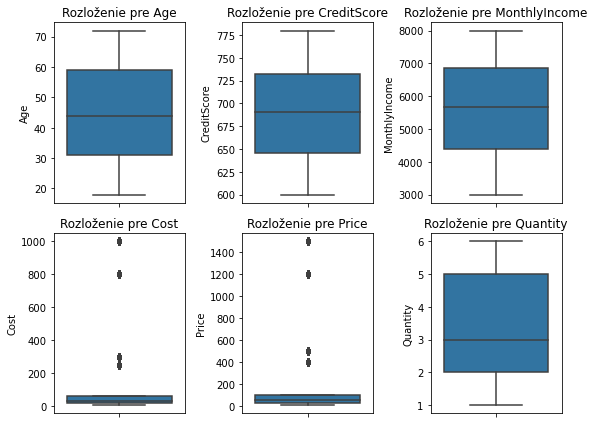

In [12]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(cis_stlpce, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=x[col])
    plt.title('Rozloženie pre ' + col)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [13]:
print (x_scaled)

[[ 0.76546472  1.77596625  1.38861296 -0.4040783  -0.40832838  0.27836319]
 [ 1.49957674  1.10410133 -1.1640775  -0.32770454 -0.33220523  1.4566201 ]
 [-1.43687133  1.61788039  1.29771803 -0.47281468 -0.48445153 -0.89989371]
 ...
 [-0.58040731 -1.58335839  0.40195195  3.30004913  3.27095718 -0.31076526]
 [ 0.1537047  -0.3977144   0.68573842  0.62696748  0.73351886  0.27836319]
 [-0.39687931 -0.06178193  0.12232862 -0.28951765 -0.28145646 -1.48902217]]


In [15]:
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(x_scaled)

df_clusters = df.copy()
df_clusters = df_clusters.loc[x.index]  
df_clusters['Cluster'] = cluster_labels

print('K-means Clustering Head:')
print(df_clusters[['Age', 'CreditScore', 'MonthlyIncome', 'Cost', 'Price', 'Quantity', 'Cluster']].head())


K-means Clustering Head:
   Age  CreditScore  MonthlyIncome  Cost  Price  Quantity  Cluster
0   57          780           7591    30     50         4        0
1   69          746           3912    50     80         6        0
2   21          772           7460    12     20         2        0
3   67          631           4765    12     20         2        0
4   57          630           3268    60    100         6        0


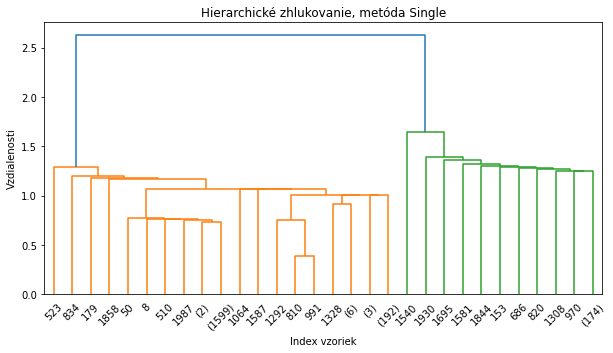

čas 0.5503196716308594 sekund 


In [24]:
start_time = time.time()
linked = linkage(x_scaled, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Hierarchické zhlukovanie, metóda Single')
plt.xlabel('Index vzoriek')
plt.ylabel('Vzdialenosti')
plt.show()
print("čas %s sekund " % (time.time() - start_time))

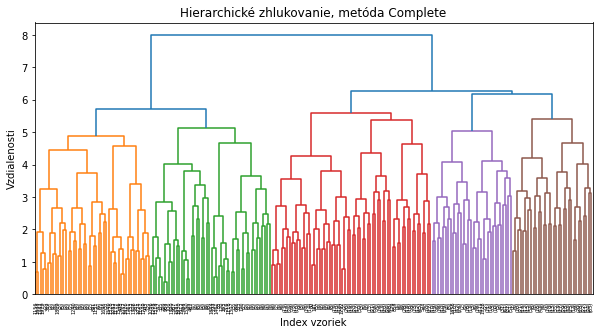

čas 10.834788084030151 sekund 


In [17]:
start_time = time.time()
linked = linkage(x_scaled, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=7)
plt.title('Hierarchické zhlukovanie, metóda Complete')
plt.xlabel('Index vzoriek')
plt.ylabel('Vzdialenosti')
plt.show()
print("čas %s sekund " % (time.time() - start_time))

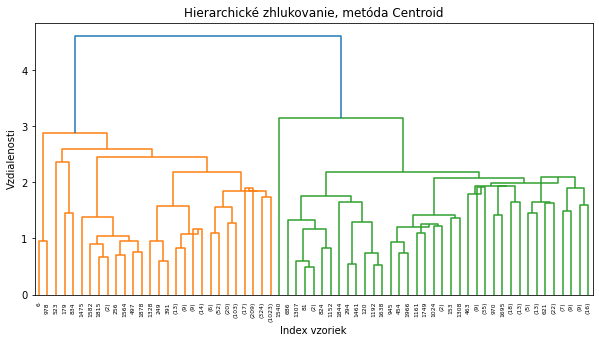

čas 2.389939546585083 sekund 


In [18]:
start_time = time.time()
linked = linkage(x_scaled, method='centroid')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=7)
plt.title('Hierarchické zhlukovanie, metóda Centroid')
plt.xlabel('Index vzoriek')
plt.ylabel('Vzdialenosti')
plt.show()
print("čas %s sekund " % (time.time() - start_time))

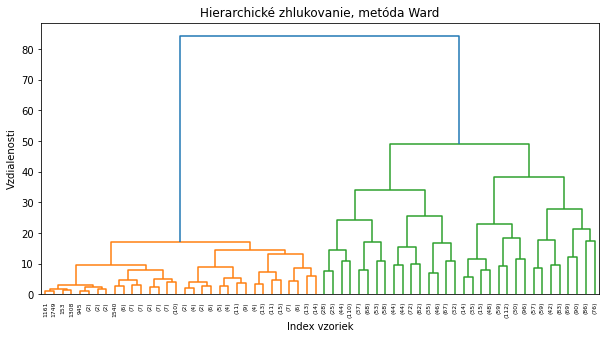

čas 2.394765615463257 sekund 


In [19]:
start_time = time.time()
linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchické zhlukovanie, metóda Ward')
plt.xlabel('Index vzoriek')
plt.ylabel('Vzdialenosti')
plt.show()
print("čas %s sekund " % (time.time() - start_time))

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

hier_clusters = fcluster(linked, t=optimal_k, criterion='maxclust')

df_clusters['HierCluster'] = hier_clusters

print('Hierarchical Clustering Head:')
print(df_clusters[['Age', 'CreditScore', 'MonthlyIncome', 'Cost', 'Price', 'Quantity', 'HierCluster']].head())


Hierarchical Clustering Head:
   Age  CreditScore  MonthlyIncome  Cost  Price  Quantity  HierCluster
0   57          780           7591    30     50         4            2
1   69          746           3912    50     80         6            2
2   21          772           7460    12     20         2            2
3   67          631           4765    12     20         2            2
4   57          630           3268    60    100         6            2


In [21]:
print (x_scaled)

[[ 0.76546472  1.77596625  1.38861296 -0.4040783  -0.40832838  0.27836319]
 [ 1.49957674  1.10410133 -1.1640775  -0.32770454 -0.33220523  1.4566201 ]
 [-1.43687133  1.61788039  1.29771803 -0.47281468 -0.48445153 -0.89989371]
 ...
 [-0.58040731 -1.58335839  0.40195195  3.30004913  3.27095718 -0.31076526]
 [ 0.1537047  -0.3977144   0.68573842  0.62696748  0.73351886  0.27836319]
 [-0.39687931 -0.06178193  0.12232862 -0.28951765 -0.28145646 -1.48902217]]


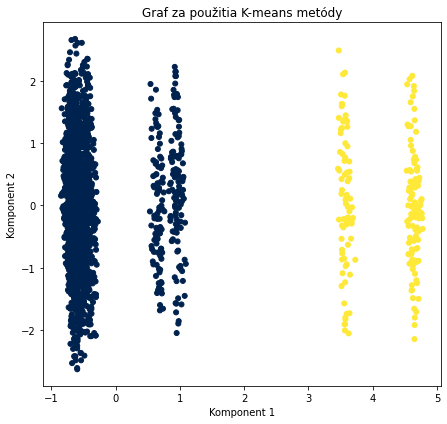

čas 0.9936637878417969 sekund 


In [22]:
start_time = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='cividis', s=25)
plt.title('Graf za použitia K-means metódy')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')

plt.tight_layout()
plt.show()
print("čas %s sekund " % (time.time() - start_time))

In [25]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=42)
labels_kmedoids = kmedoids.fit_predict(x_scaled)
df['KMedoidsCluster'] = labels_kmedoids

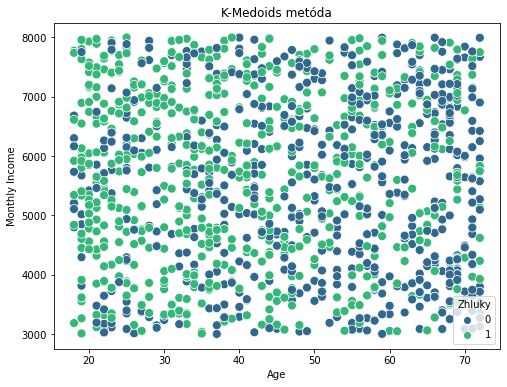

čas 0.5357439517974854 sekund 


In [26]:
start_time = time.time()
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='KMedoidsCluster', palette='viridis', s=80)
plt.title('K-Medoids metóda')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Zhluky')
plt.show()
print("čas %s sekund " % (time.time() - start_time))

Optimal number of clusters based on silhouette score: 2
Cluster Centers (Mean values for each feature):
             Age  CreditScore  MonthlyIncome        Cost        Price  \
Zhluk                                                                   
0      44.645925   689.629405    5588.814427   56.845815    93.195485   
1      42.923913   695.032609    5598.407609  915.217391  1372.826087   

       Quantity  
Zhluk            
0      3.519824  
1      3.603261  
Cluster Sizes:
0    1816
1     184
Name: Zhluk, dtype: int64


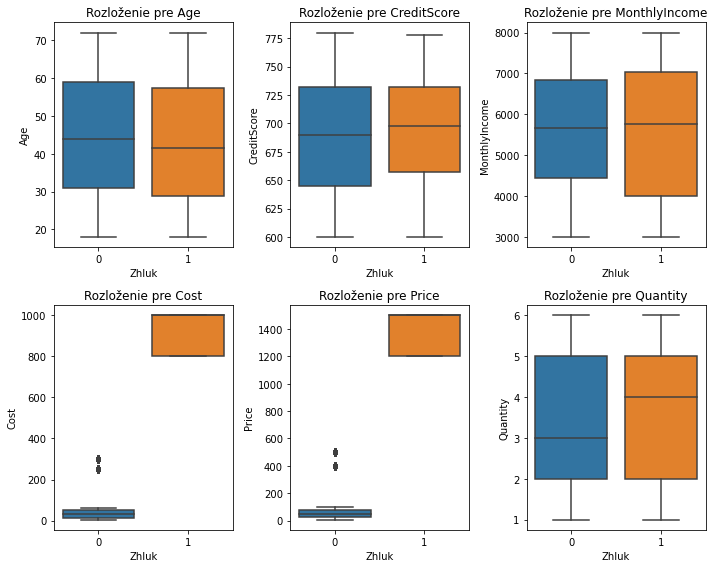

Rozdelenie pohlavia podľa zhlukov (%):
Gender     Female       Male
Zhluk                       
0       50.715859  49.284141
1       51.630435  48.369565
Rozdelenie kategórií podľa zhlukov (%):
Category      books  electronics  fashion  home appliances       toys
Zhluk                                                                
0         22.356828     9.746696  21.9163        23.292952  22.687225
1          0.000000   100.000000   0.0000         0.000000   0.000000
Rozdelenie spôsobu platby podľa zhlukov (%):
PaymentMethod  Cash On Delivery  Credit Card  Debit Card     Paypal
Zhluk                                                              
0                     23.966408    34.431525   30.943152  10.658915
1                     24.342105    32.894737   32.236842  10.526316
Detailný popis zhlukov:
Zhluk 0 (1816 zákazníkov):
  Vek: Mean = 44.6, Rozsah = 18-72
  Kreditné skóre: Mean = 689.6, Rozsah = 600-780
  Mesačný príjem: Mean = $5588.81, Rozsah = $3001-$7999
  Priemerný nákup

In [28]:
numerical_features = ['Age', 'CreditScore', 'MonthlyIncome', 'Cost', 'Price', 'Quantity']
X = df[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
optimal_k =2
df = df.rename(columns={'Cluster': 'Zhluk'})

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Zhluk'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Zhluk'] = df['Zhluk']

cluster_stats = df.groupby('Zhluk')[numerical_features].mean()
print("\
Cluster Centers (Mean values for each feature):")
print(cluster_stats)

cluster_sizes = df['Zhluk'].value_counts().sort_index()
print("\
Cluster Sizes:")
print(cluster_sizes)

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Zhluk', y=feature, data=df)
    plt.title(f'Rozloženie pre {feature}')
plt.tight_layout()
plt.show()

if 'Gender' in df.columns and 'Category' in df.columns:
    gender_cluster = pd.crosstab(df['Zhluk'], df['Gender'], normalize='index') * 100
    print("\
Rozdelenie pohlavia podľa zhlukov (%):")
    print(gender_cluster)
    category_cluster = pd.crosstab(df['Zhluk'], df['Category'], normalize='index') * 100
    print("\
Rozdelenie kategórií podľa zhlukov (%):")
    print(category_cluster)
    if 'PaymentMethod' in df.columns:
        payment_cluster = pd.crosstab(df['Zhluk'], df['PaymentMethod'], normalize='index') * 100
        print("\
Rozdelenie spôsobu platby podľa zhlukov (%):")
        print(payment_cluster)
print("\
Detailný popis zhlukov:")
for cluster in sorted(df['Zhluk'].unique()):
    cluster_data = df[df['Zhluk'] == cluster]
    print("\
Zhluk " + str(cluster) + " (" + str(len(cluster_data)) + " zákazníkov):")
    print("  Vek: Mean = " + str(round(cluster_data['Age'].mean(), 1)) + ", Rozsah = " + str(cluster_data['Age'].min()) + "-" + str(cluster_data['Age'].max()))
    print("  Kreditné skóre: Mean = " + str(round(cluster_data['CreditScore'].mean(), 1)) + ", Rozsah = " + str(cluster_data['CreditScore'].min()) + "-" + str(cluster_data['CreditScore'].max()))
    print("  Mesačný príjem: Mean = $" + str(round(cluster_data['MonthlyIncome'].mean(), 2)) + ", Rozsah = $" + str(cluster_data['MonthlyIncome'].min()) + "-$" + str(cluster_data['MonthlyIncome'].max()))
    print("  Priemerný nákup: Cost = $" + str(round(cluster_data['Cost'].mean(), 2)) + ", Rozsah = $" + str(round(cluster_data['Price'].mean(), 2)) + ", Quantity = " + str(round(cluster_data['Quantity'].mean(), 1)))
    
    if 'Gender' in df.columns:
        top_gender = cluster_data['Gender'].value_counts().idxmax()
        gender_pct = cluster_data['Gender'].value_counts(normalize=True)[top_gender] * 100
        print("  Prevládajúce pohlavie: " + top_gender + " (" + str(round(gender_pct, 1)) + "%)")
    if 'Category' in df.columns:
        top_category = cluster_data['Category'].value_counts().idxmax()
        category_pct = cluster_data['Category'].value_counts(normalize=True)[top_category] * 100
        print("  Top kategória: " + top_category + " (" + str(round(category_pct, 1)) + "%)")
    if 'PaymentMethod' in df.columns:
        top_payment = cluster_data['PaymentMethod'].value_counts().idxmax()
        payment_pct = cluster_data['PaymentMethod'].value_counts(normalize=True)[top_payment] * 100
        print("  Preferovaná platobná metóda: " + top_payment + " (" + str(round(payment_pct, 1)) + "%)")
        print("---------")

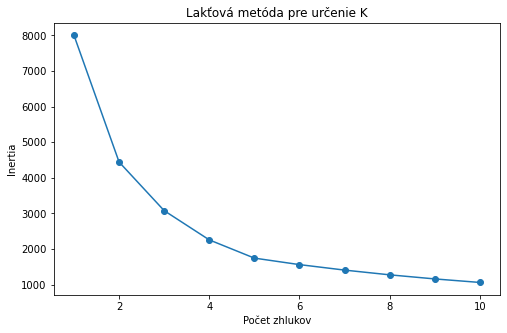

In [40]:
from sklearn.cluster import KMeans

inertia = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o')
plt.title("Lakťová metóda pre určenie K")
plt.xlabel("Počet zhlukov")
plt.ylabel("Inertia")
plt.show()

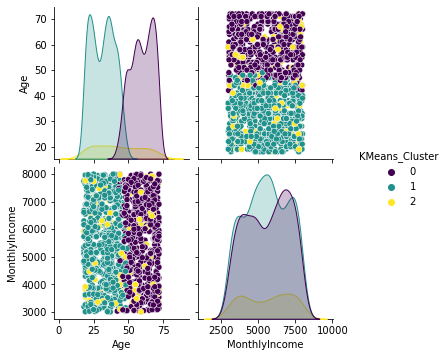

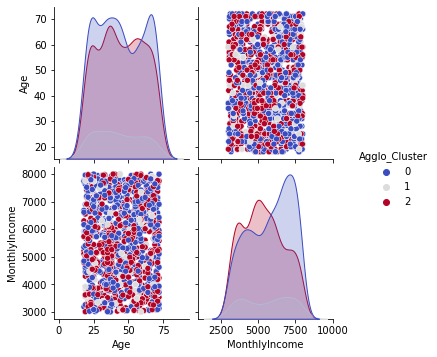

In [17]:
sns.pairplot(df1, vars=['Age', 'MonthlyIncome'], hue='KMeans_Cluster', palette='viridis')
plt.show()
sns.pairplot(df1, vars=['Age', 'MonthlyIncome'], hue='Agglo_Cluster', palette='coolwarm')
plt.show()

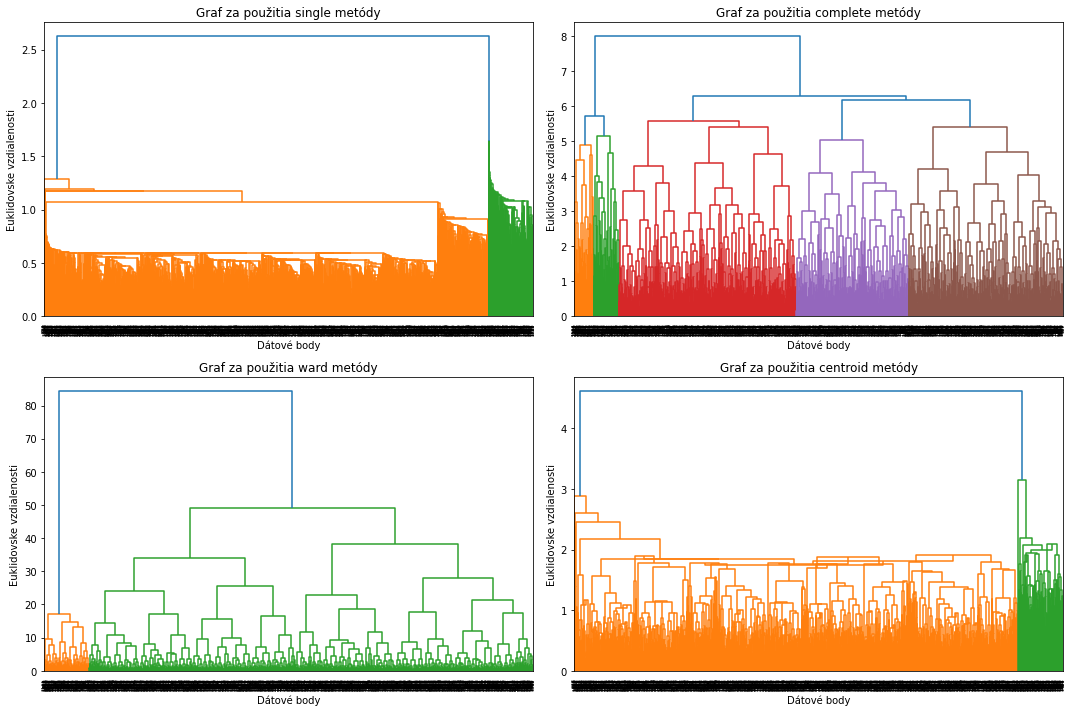

In [22]:
methods = ['single', 'complete', 'ward', 'centroid']
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    linked = linkage(x_scaled, method=method)
    dendrogram(linked)
    plt.title(f"Graf za použitia {method} metódy")
    plt.xlabel("Dátové body")
    plt.ylabel("Euklidovske vzdialenosti")
plt.tight_layout()
plt.show()

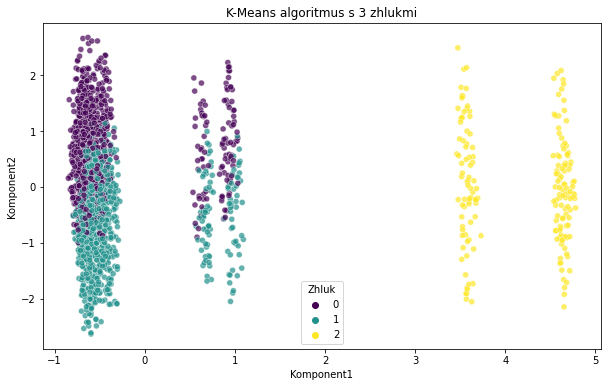

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

optimal_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(x_scaled)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df["Cluster"], palette="viridis", data=df, alpha=0.7)
plt.title("K-Means algoritmus s 3 zhlukmi")
plt.xlabel("Komponent1")
plt.ylabel("Komponent2")
plt.legend(title="Zhluk")
plt.show()